In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# MNIST

## Load Data

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train Labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test Labels: {dict(zip(unique, counts))}")

Train Labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test Labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [4]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
images = x_train[indexes]
labels = y_train[indexes]

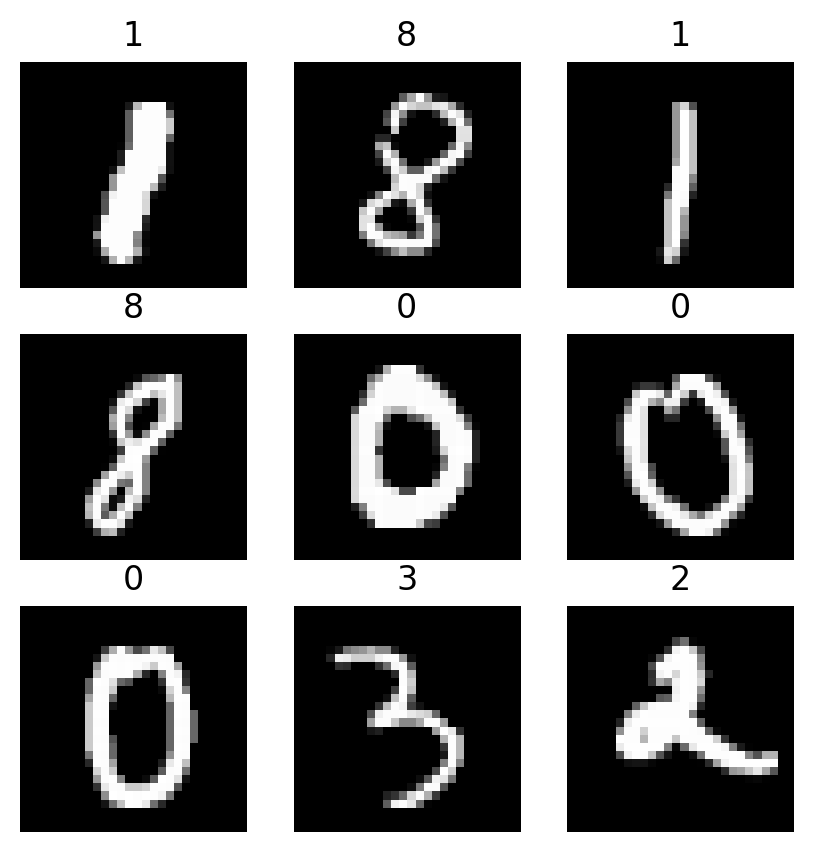

In [5]:
plt.figure(figsize=(5, 5))
for i in range(len(indexes)):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.title(labels[i])
plt.show()

## Preprocessing

In [6]:
num_labels = len(unique)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = np.reshape(x_train, [-1, x_train.shape[1], x_train.shape[2], 1])
x_test = np.reshape(x_test, [-1, x_test.shape[1], x_test.shape[2], 1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

input_shape = x_train.shape[1:]

# LeNet-5

### Input Shape: 28x28x1(MNIST)
**Convolution Layers**

1. ConV_1 (5x5, s=1, activation='tanh', filters=  6, padding='same')
2. Pooling_2 (f=2, s=2, padding='valid')
3. ConV_3 (5x5, s=1, activation='tanh', filters= 16, padding='valid')
4. Pooling_4 (f=2, s=2, padding='valid')
5. ConV_5 (5x5, s=1, activation='tanh', filters=120, padding='valid')

**Fully Connected Layers**

6. Dense(units=84, activation='tanh')

**Outputs**

7. Dense(units=10, activation='softmax')

In [7]:
from LeNet import build_lenet_5, lr_schedule

In [8]:
model = build_lenet_5(input_shape=input_shape)
model.summary()

Metal device set to: Apple M2
Model: "LeNet_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           

2023-03-17 20:54:03.848946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-17 20:54:03.849039: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
import os

save_dir = os.path.join(os.getcwd(), 'LeNet')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

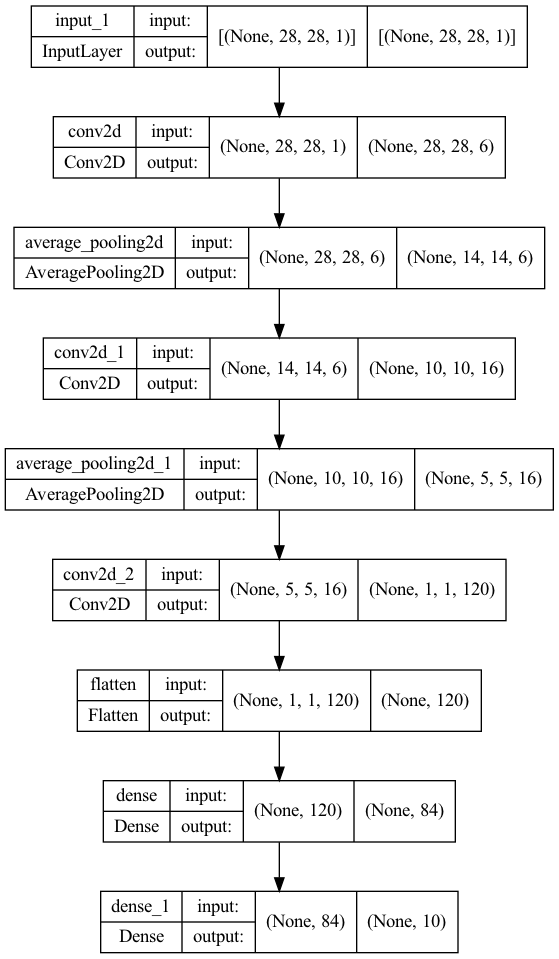

In [10]:
filepath1 = os.path.join(save_dir, 'LeNet5.png')

keras.utils.plot_model(model=model,
                       to_file=filepath1,
                       show_shapes=True
                      )

In [11]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler

model_name = 'mnist_lenet_v5.{epoch:03d}.h5'
filepath2 = os.path.join(save_dir, model_name)

lr_scheduler = LearningRateScheduler(lr_schedule)
checkpoints = ModelCheckpoint(filepath=filepath2,
                              monitor='val_accuracy',
                              verbose=1,
                              save_best_only=True
                             )
callbacks = [checkpoints, lr_scheduler]

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy']
             )

In [12]:
hist = model.fit(x_train, y_train, 
                 batch_size=32, 
                 epochs=20,
                 validation_data=(x_test, y_test),
                 callbacks=callbacks,
                 verbose=2,
                 shuffle=True
                )

Epoch 1/20


2023-03-17 20:54:04.679901: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-17 20:54:04.826522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-17 20:54:19.360757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.64310, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/LeNet/mnist_lenet_v5.001.h5
1875/1875 - 16s - loss: 2.1945 - accuracy: 0.4328 - val_loss: 2.0447 - val_accuracy: 0.6431 - lr: 5.0000e-04 - 16s/epoch - 9ms/step
Epoch 2/20

Epoch 2: val_accuracy improved from 0.64310 to 0.72850, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/LeNet/mnist_lenet_v5.002.h5
1875/1875 - 16s - loss: 1.7402 - accuracy: 0.6691 - val_loss: 1.3744 - val_accuracy: 0.7285 - lr: 5.0000e-04 - 16s/epoch - 8ms/step
Epoch 3/20

Epoch 3: val_accuracy improved from 0.72850 to 0.80060, saving model to /Users/jaehwan/Desktop/Git/Artificial-Intelligence/DeepLearning/CV_Model/LeNet/mnist_lenet_v5.003.h5
1875/1875 - 16s - loss: 1.1267 - accuracy: 0.7525 - val_loss: 0.9160 - val_accuracy: 0.8006 - lr: 5.0000e-04 - 16s/epoch - 8ms/step
Epoch 4/20

Epoch 4: val_accuracy improved from 0.80060 to 0.82

In [13]:
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test accuracy: {(100*acc):>.1f}%")

313/313 [==============================] - 2s 6ms/step - loss: 0.6160 - accuracy: 0.8590
Test accuracy: 85.9%


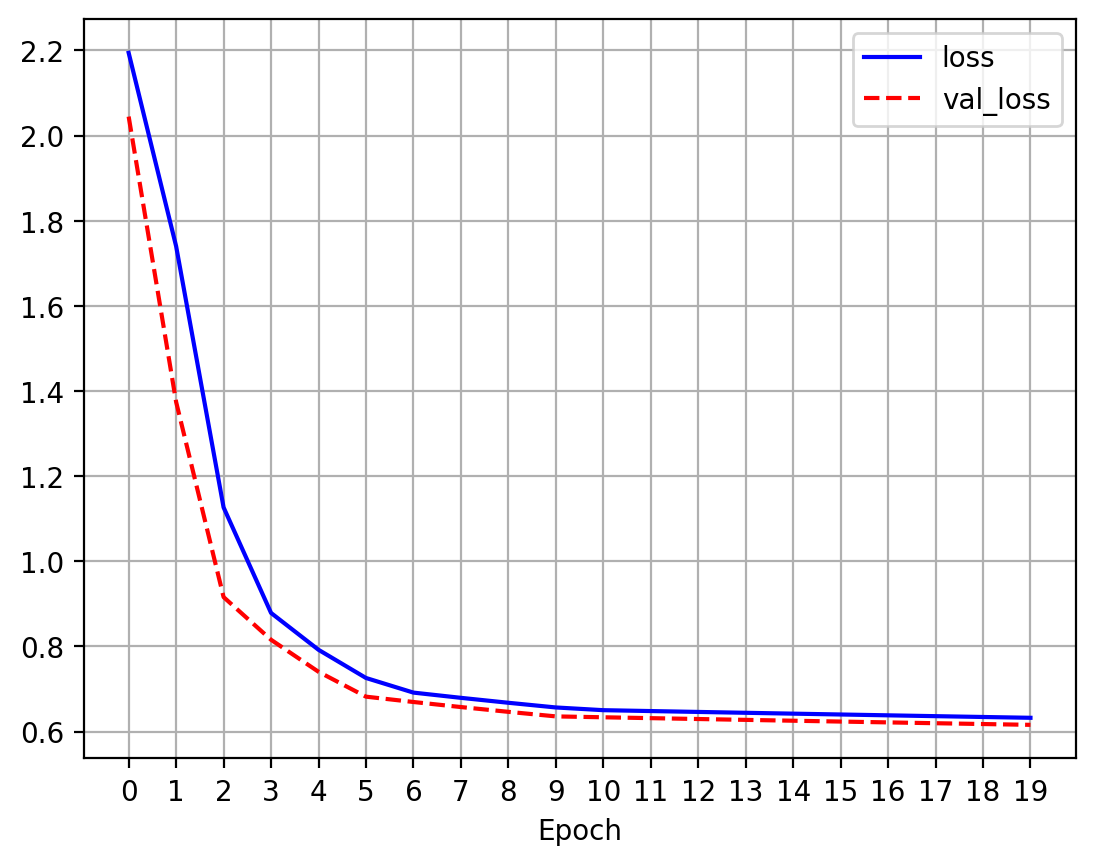

In [14]:
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.plot(hist.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

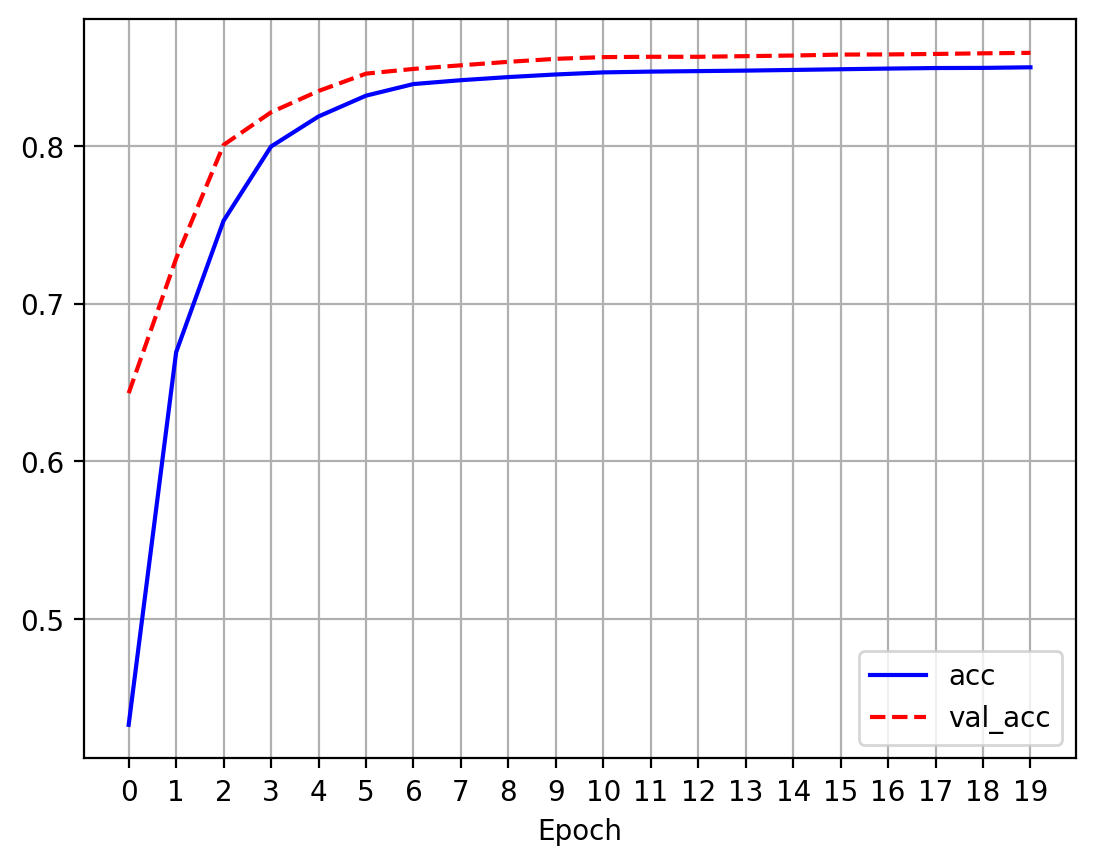

In [15]:
plt.plot(hist.history['accuracy'], 'b-', label='acc')
plt.plot(hist.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

In [16]:
%load_ext tensorboard

In [17]:
new_model = build_lenet_5(input_shape=input_shape)
new_model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy']
                 )

In [18]:
new_model.evaluate(x_test,y_test)

 18/313 [>.............................] - ETA: 1s - loss: 2.2956 - accuracy: 0.1024

2023-03-17 20:59:24.656370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 2.2954 - accuracy: 0.1166


[2.2954368591308594, 0.11660000681877136]

In [19]:
log_dir = 'log'
filepath3 = os.path.join(save_dir, log_dir)

tensorboard_cb = keras.callbacks.TensorBoard(filepath3, histogram_freq=1)

In [20]:
new_model.fit(x_train, y_train,
              epochs=20,
              batch_size=32,
              validation_data=(x_test, y_test),
              callbacks=[tensorboard_cb]
             )

Epoch 1/20
   6/1875 [..............................] - ETA: 20s - loss: 2.2921 - accuracy: 0.0677 

2023-03-17 20:59:26.782383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 10ms/step - loss: 0.6319 - accuracy: 0.8379 - val_loss: 0.3000 - val_accuracy: 0.9153
Epoch 2/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2684 - accuracy: 0.9210 - val_loss: 0.2159 - val_accuracy: 0.9365
Epoch 3/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2033 - accuracy: 0.9399 - val_loss: 0.1701 - val_accuracy: 0.9501
Epoch 4/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1606 - accuracy: 0.9520 - val_loss: 0.1334 - val_accuracy: 0.9589
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1303 - accuracy: 0.9612 - val_loss: 0.1108 - val_accuracy: 0.9675
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1096 - accuracy: 0.9671 - val_loss: 0.0931 - val_accuracy: 0.9726
Epoch 7/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0936 - accuracy: 0.9722 - val_loss: 0.0842 - val_accuracy: 0.

In [21]:
%tensorboard --logdir $filepath3

In [22]:
"""
.save_weights(path)
.save(path)
keras.models.load_model(path)
"""

'\n.save_weights(path)\n.save(path)\nkeras.models.load_model(path)\n'

# ImageNet
## LoadData

# AlexNet

In [23]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.


### Input Shape: 227x227x3(ImageNet)
**Convolution Layers**

1. ConV (11x11, s=4, activation='relu', filters=96, padding='valid')
2. MaxPool (f=3, s=2)
3. BatchNorm
4. ConV (5x5, s=1, activation='relu', filters=256, padding='same', regularizer='l2')
5. MaxPool (f=3, s=2, padding='valid')
6. BatchNorm
7. ConV (3x3, s=1, activation='relu', filters=384, pading='same', regularizer='l2')
8. BatchNorm
9. ConV (3x3, s=1, activation='relu', filters=384, pading='same', regularizer='l2')
10. BatchNorm
11. ConV (3x3, s=1, activation='relu', filters=256, pading='same', regularizer='l2')
12. BatchNorm
13. MaxPool (f=3, s=2, padding='valid')
14. Flatten

**Fully Connected Layers**

15. Dense(units=4096, activation='relu')
16. Dropout(0.5)
17. Dense(units=4096, activation='relu')
18. Dropout(0.5)

**Outputs**

19. Dense(units=1000, activation='softmax')

In [25]:
from AlexNet import build_alexnet

model = build_alexnet((227,227,3))
model.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 256)      0   

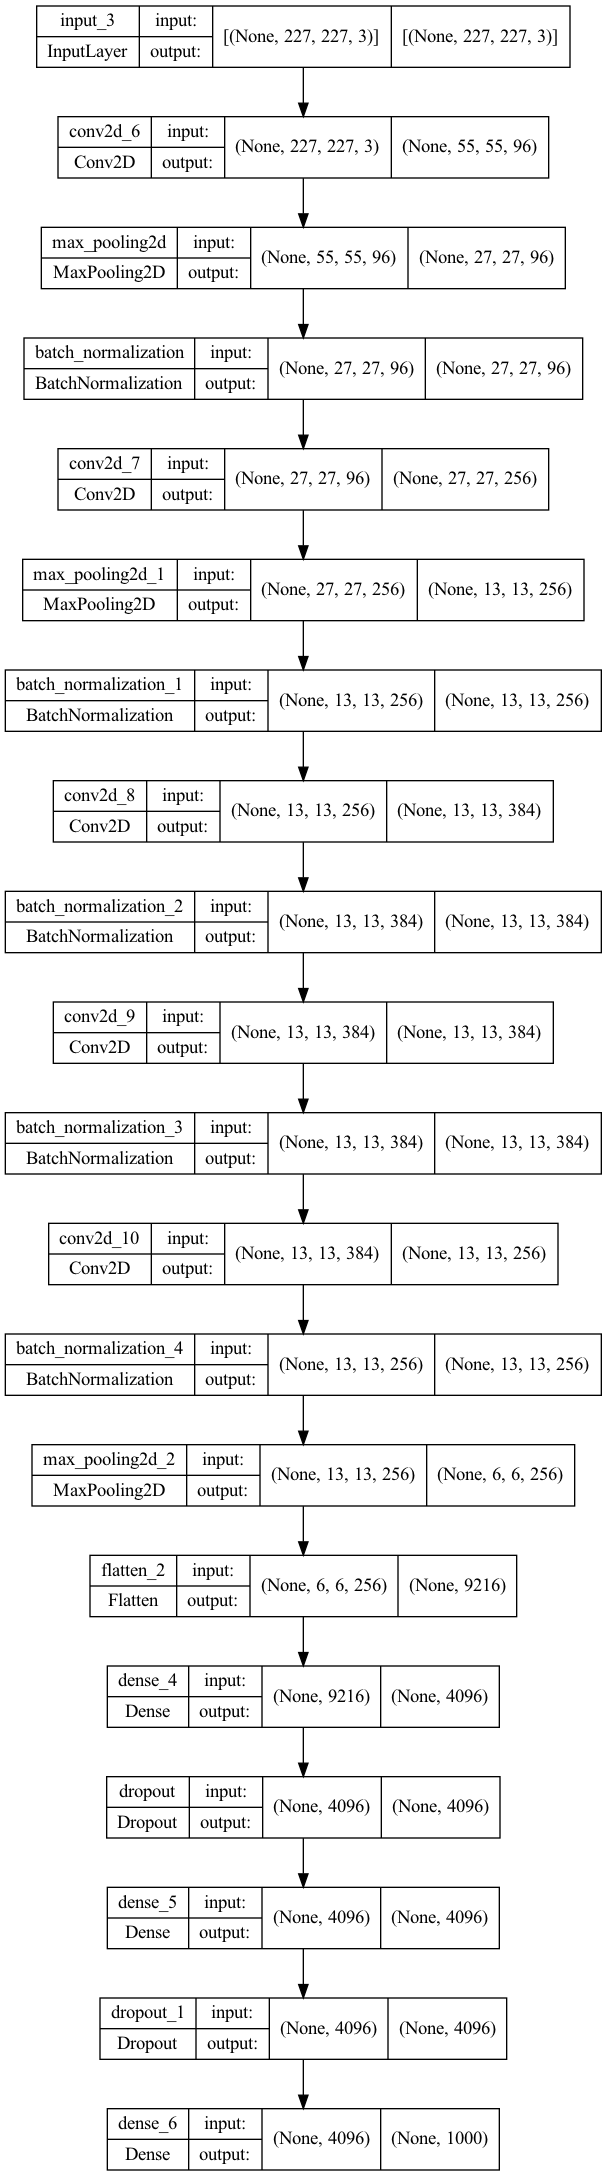

In [26]:
import os

save_dir = os.path.join(os.getcwd(), 'AlexNet')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

filepath1 = os.path.join(save_dir, 'AlexNet.png')

keras.utils.plot_model(model=model,
                       to_file=filepath1,
                       show_shapes=True
                      )

# VGG16

In [27]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Input Shape: 28x28x1(MNIST)
**Convolution Layers**

- ConV (k=3, s=1, f=64, a='relu', p='same')
- ConV (k=3, s=1, f=64, a='relu', p='same')
- MaxPool (p=2, s=2)

- ConV (k=3, s=1, f=128, a='relu', p='same')
- ConV (k=3, s=1, f=128, a='relu', p='same')
- MaxPool (p=2, s=2)

- ConV (k=3, s=1, f=256, a='relu', p='same')
- ConV (k=3, s=1, f=256, a='relu', p='same')
- ConV (k=3, s=1, f=256, a='relu', p='same')
- MaxPool (p=2, s=2)

- ConV (k=3, s=1, f=512, a='relu', p='same')
- ConV (k=3, s=1, f=512, a='relu', p='same')
- ConV (k=3, s=1, f=512, a='relu', p='same')
- MaxPool (p=2, s=2)

- ConV (k=3, s=1, f=512, a='relu', p='same')
- ConV (k=3, s=1, f=512, a='relu', p='same')
- ConV (k=3, s=1, f=512, a='relu', p='same')
- MaxPool (p=2, s=2)

**Fully Connected Layers**

- Flatten
- Dense(units=4096, activation='relu')
- Dropout(0.5)
- Dense(units=4096, activation='relu')
- Dropout(0.5)

**Outputs**

10. Dense(units=1000, activation='softmax')

In [31]:
from VGG16 import build_vgg16

model = build_vgg16((227, 227, 3))
model.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_24 (Conv2D)          (None, 227, 227, 64)      1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 113, 113, 128)     73856     
                                                                 
 conv2d_27 (Conv2D)          (None, 113, 113, 128)     147584    
                                                             

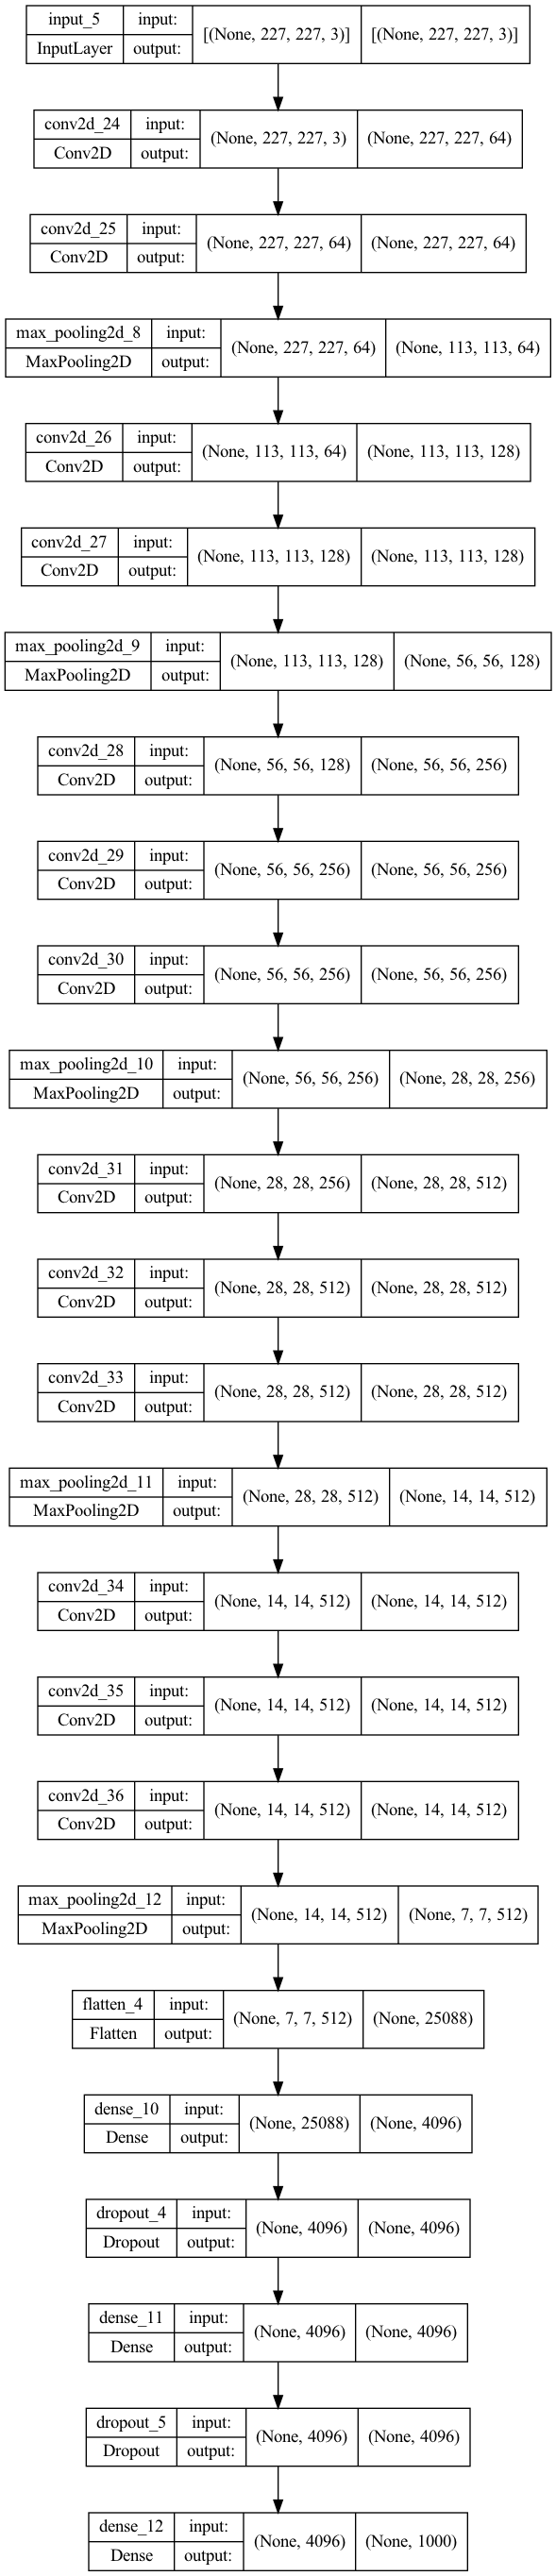

In [32]:
import os

save_dir = os.path.join(os.getcwd(), 'VGG16')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
    
filepath1 = os.path.join(save_dir, 'VGG16.png')

keras.utils.plot_model(model=model,
                       to_file=filepath1,
                       show_shapes=True
                      )

# GoogleNet
## Inception Module
### bottleneck layer

In [17]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


### Input Shape: 28x28x1(MNIST)
**Convolution Layers**

- Conv(k=3, s=2)
- Pool(p=3, s=2)
- BatchNorm
- Conv(k=1) Bottleneck layer
- Conv(k=3, s=1)
- BatchNorm
- Pool(p=3, s=2)

**Fully Connected Layers**

- Flatten
- Dense(units=4096, activation='relu')
- Dropout(0.5)
- Dense(units=4096, activation='relu')
- Dropout(0.5)

**Outputs**

10. Dense(units=1000, activation='softmax')

In [18]:
from GoogLeNet import 

SyntaxError: invalid syntax (2772562568.py, line 1)

In [19]:
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, concatenate

def inception_module(x, filters_1x1,
                     filters_3x3_reduce, filters_3x3,
                     filters_5x5_reduce, filters_5x5,
                     filters_pool_proj, name=None):
    # 1x1 ConV
    conv_1x1 = Conv2D(filters=filters_1x1,
                      kernel_size=1,
                      padding='same',
                      activation='relu',
                      kernel_initializer=kernel_init,
                      bias_initializer=bias_init)(x)
    
    # 1x1 ConV + 3x3 ConV
    pre_conv_3x3 = Conv2D(filters=filters_3x3_reduce,
                          kernel_size=1,
                          padding='same',
                          activation='relu',
                          kernel_initializer=kernel_init,
                          bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters=filters_3x3,
                      kernel_size=3,
                      padding='same',
                      activation='relu',
                      kernel_initializer=kernel_init,
                      bias_initializer=bias_init)(pre_conv_3x3)
    
    # 1x1 ConV + 5x5 ConV
    pre_conv_5x5 = Conv2D(filters=filters_5x5_reduce,
                          kernel_size=1,
                          padding='same',
                          activation='relu',
                          kernel_initializer=kernel_init,
                          bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters=filters_5x5,
                      kernel_size=5,
                      padding='same',
                      activation='relu',
                      kernel_initializer=kernel_init,
                      bias_initializer=bias_init)(pre_conv_5x5)
    
    # Pool + 1x1 ConV
    pool_proj = MaxPool2D(pool_size=3,
                          strides=1,
                          padding='same')(x)
    pool_proj = Conv2D(filters=filters_pool_proj,
                       kernel_size=1,
                       padding='same',
                       activation='relu',
                       kernel_initializer=kernel_init,
                       bias_initializer=bias_init)(pool_proj)
    
    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [20]:
from keras.layers import BatchNormalization, AveragePooling2D, Dropout, Dense

In [21]:
input_layer= keras.Input(shape=(244, 244, 3))

kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

x = Conv2D(filters=64,
           kernel_size=7,
           padding='same',
           strides=2,
           activation='relu',
           name='conv_1_7x7/2',
           kernel_initializer=kernel_init,
           bias_initializer=bias_init)(input_layer)
x = MaxPool2D(pool_size=3,
              padding='same',
              strides=2,
              name='max_pool_1_3x3/2')(x)
x = BatchNormalization()(x)

x = Conv2D(filters=64,
           kernel_size=1,
           padding='same',
           strides=1,
           activation='relu')(x)
x = Conv2D(filters=192,
           kernel_size=3,
           padding='same',
           strides=1,
           activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size=3,
              padding='same',
              strides=2)(x)

In [22]:
x = inception_module(x, filters_1x1=64, filters_3x3_reduce=96, filters_3x3=128,
                     filters_5x5_reduce=16, filters_5x5=32, filters_pool_proj=32,
                     name='inception_3a')
x = inception_module(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=192,
                     filters_5x5_reduce=32, filters_5x5=96, filters_pool_proj=64,
                     name='inception_3b')
x = MaxPool2D((3,3), padding='same', strides=(2,2))(x)

In [23]:
x = inception_module(x, filters_1x1=192, filters_3x3_reduce=96, filters_3x3=208,
                     filters_5x5_reduce=16, filters_5x5=48, filters_pool_proj=64,
                     name='inception_4a')
x = inception_module(x, filters_1x1=160, filters_3x3_reduce=112, filters_3x3=224,
                     filters_5x5_reduce=24, filters_5x5=64, filters_pool_proj=64,
                     name='inception_4b')
x = inception_module(x, filters_1x1=128, filters_3x3_reduce=128, filters_3x3=256,
                     filters_5x5_reduce=24, filters_5x5=64, filters_pool_proj=64,
                     name='inception_4c')
x = inception_module(x, filters_1x1=112, filters_3x3_reduce=144, filters_3x3=288,
                     filters_5x5_reduce=32, filters_5x5=64, filters_pool_proj=64,
                     name='inception_4d')
x = inception_module(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320,
                     filters_5x5_reduce=32, filters_5x5=128, filters_pool_proj=128,
                     name='inception_4e')
x = MaxPool2D((3,3), padding='same', strides=(2,2), name='max_pool_4_3x3/2')(x)

In [24]:
x = inception_module(x, filters_1x1=256, filters_3x3_reduce=160, filters_3x3=320,
                     filters_5x5_reduce=32, filters_5x5=128, filters_pool_proj=128,
                     name='inception_5a')(x)
x = inception_module(x, filters_1x1=384, filters_3x3_reduce=192, filters_3x3=384,
                     filters_5x5_reduce=48, filters_5x5=128, filters_pool_proj=128,
                     name='inception_5b')(x)

TypeError: 'KerasTensor' object is not callable

In [25]:
x = AveragePooling2D(pool_size=7,
                     strides=1,
                     padding='valid')(x)
x = Dropout(0.4)(x)
x = Dense(10, activation='softmax', name='output')(x)

model = keras.Input(inputs = input_layer, outputs = x, name='GoogLeNet')

ValueError: Please provide to Input a `shape` or a `tensor` or a `type_spec` argument. Note that `shape` does not include the batch dimension.

In [13]:
import math
from keras.callbacks import LearningRateScheduler

In [ ]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

lr_schedule = LearningRateScheduler(decay, verbose=1)
sgd = keras.optimizers.SGD(learning_rate=initial_lrate, momentum=0.9, nesterov=False)

model.com